# Homework 14 - ML project
## Random Forest (RF) & Support Vector Machines (SVM)

#### Lin, Yu-Jen 
#### NTU student ID: b04b01036
#### email: b04b01036@ntu.edu.tw


# 1. Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from scipy import stats

In [2]:
import sklearn
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()

In [3]:
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
print(breast_cancer.data.shape)

(569, 30)


In [7]:
n_samples, n_features = breast_cancer.data.shape
print((n_samples, n_features))
print(breast_cancer.data[0])

(569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [8]:
print(breast_cancer.target.shape)
print(breast_cancer.target)

(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

In [9]:
print(breast_cancer.target_names)

['malignant' 'benign']


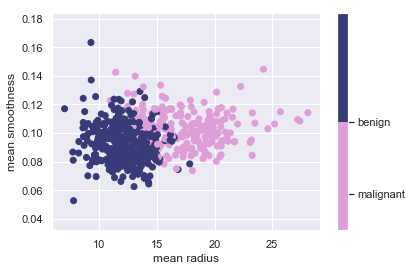

In [10]:
# quick view for breast_cancer datasets

# breast_cancer.data has 30 features
x_index = 0 # mean radius
y_index = 4 # mean smoothness

#   0   'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
#   5   'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
#  10   'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error',
#  15   'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error',
#  20   'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
#  25   'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: breast_cancer.target_names[int(i)])

plt.scatter(breast_cancer.data[:, x_index], breast_cancer.data[:, y_index],
            c=breast_cancer.target, cmap=plt.cm.get_cmap('tab20b_r', 2))    # 'tab20b_r' is color code of matplotlib
plt.colorbar(ticks=[0, 1], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(breast_cancer.feature_names[x_index])
plt.ylabel(breast_cancer.feature_names[y_index]);

# 2. Split the datasets

In [11]:
x = breast_cancer.data
y = breast_cancer.target

from sklearn.model_selection import train_test_split
# add random_state to fix the seed used by the random number generator
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target,
                                                    test_size = 0.2, random_state=0) 

# 3. Set estimators

## 3-1 Set estimator - RF
RF: set your parameters (n_estimators, max_depth)

In [43]:
from sklearn.ensemble import RandomForestClassifier
# add random_state to fix the seed used by the random number generator
RF = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10)

## 3-2 Set estimator - SVM
SVM: use non-linear kernel

In [49]:
from sklearn.svm import SVC  # "Support Vector Classifier"
SVM = SVC(kernel='rbf', probability=True) # non-linear: 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable

# 4. Training the model

## 4-1 Training the model - RF

In [14]:
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## 4-2 Training the model - SVM

In [ ]:
SVM.fit(x_train, y_train)

# 5. Prediction

## 5-1 Prediction - RF

In [24]:
y_pred_RF = RF.predict(x_test)
y_pred_RF

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1])

## 5-2 Prediction - SVM

In [46]:
y_pred_SVM = SVM.predict(x_test)
y_pred_SVM

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

# 6. Evaluate (cross-validation and confusion matrix)

### Correct

In [26]:
print('RF:',"{0} / {1} correct".format(np.sum(y_test == y_pred_RF), len(y_test)))
print('SNM:',"{0} / {1} correct".format(np.sum(y_test == y_pred_SVM), len(y_test)))

RF: 109 / 114 correct
SNM: 67 / 114 correct


### Accuracy score

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy of  RF:' ,accuracy_score(y_test, y_pred_RF))
print('Accuracy of SVM:' ,accuracy_score(y_test, y_pred_SVM))

Accuracy of  RF: 0.956140350877193
Accuracy of SVM: 0.5877192982456141


### Classification report

In [28]:
from sklearn import metrics
Table_RF = metrics.classification_report(y_pred_RF, y_test)
Table_SVM = metrics.classification_report(y_pred_SVM, y_test)
print ('[Table_RF]\n', Table_RF, '\n\n\n\n\n[Table_SVM]\n', Table_SVM)

[Table_RF]
              precision    recall  f1-score   support

          0       0.94      0.96      0.95        46
          1       0.97      0.96      0.96        68

avg / total       0.96      0.96      0.96       114
 




[Table_SVM]
              precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.59      0.74       114

avg / total       1.00      0.59      0.74       114



/Users/Jennifer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Cross-validation

In [42]:
from sklearn.model_selection import cross_val_score
scores_RF = cross_val_score(RF, x, y, cv=5)
scores_SVM = cross_val_score(SVM, x, y, cv=5)
print('cross_val_score_RF :', scores_RF)
print('cross_val_score_SVM:', scores_SVM)
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("\n RF 95 confidence interval: %0.2f (+/- %0.2f)" % (scores_RF.mean(), scores_RF.std() * 2))
print("SVM 95 confidence interval: %0.2f (+/- %0.2f)" % (scores_SVM.mean(), scores_SVM.std() * 2))

cross_val_score_RF : [0.93043478 0.93913043 0.96460177 0.95575221 0.96460177]
cross_val_score_SVM: [0.62608696 0.62608696 0.62831858 0.62831858 0.62831858]

 RF 95 confidence interval: 0.95 (+/- 0.03)
SVM 95 confidence interval: 0.63 (+/- 0.00)


### Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
confmat_RF = confusion_matrix(y_true=y_test, y_pred=y_pred_RF)
confmat_SVM = confusion_matrix(y_true=y_test, y_pred=y_pred_SVM)
print ('confmat_RF\n', confmat_RF, '\n\nconfmat_SVM\n', confmat_SVM)

confmat_RF
 [[44  3]
 [ 2 65]] 

confmat_SVM
 [[ 0 47]
 [ 0 67]]


In [32]:
import seaborn as sns; sns.set()

RF confusion matrix


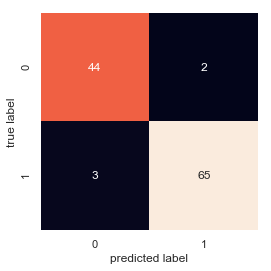

In [33]:
# visulization - RF
print('RF confusion matrix')
sns.heatmap(confmat_RF.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label');

RF: I find that a simple, untuned random forest results in a very accurate classification of the breast cancer data.

SVM confusion matrix


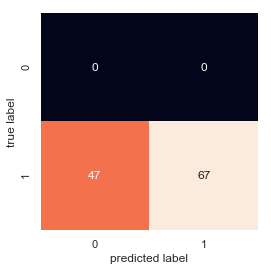

In [34]:
# visulization - SVM
print('SVM confusion matrix')
sns.heatmap(confmat_SVM.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label');

SVM: I find that a untuned SVM results in a medium accurate classification of the breast cancer data.
     Maybe I need to tune the parameters in order to get better results.

### Probabilities for each label

In [36]:
RF.predict_proba(x_test)  #show the probabilities for each label (0,1) by RF model

array([[0.7348619 , 0.2651381 ],
       [0.04448881, 0.95551119],
       [0.04227463, 0.95772537],
       [0.11620911, 0.88379089],
       [0.038058  , 0.961942  ],
       [0.038058  , 0.961942  ],
       [0.0516957 , 0.9483043 ],
       [0.04356649, 0.95643351],
       [0.04448881, 0.95551119],
       [0.038058  , 0.961942  ],
       [0.59625811, 0.40374189],
       [0.12057799, 0.87942201],
       [0.04102911, 0.95897089],
       [0.64215526, 0.35784474],
       [0.4891325 , 0.5108675 ],
       [0.89368067, 0.10631933],
       [0.2093166 , 0.7906834 ],
       [0.96534209, 0.03465791],
       [0.95951309, 0.04048691],
       [0.97434194, 0.02565806],
       [0.7867613 , 0.2132387 ],
       [0.91762977, 0.08237023],
       [0.09585389, 0.90414611],
       [0.03713887, 0.96286113],
       [0.92456977, 0.07543023],
       [0.03713887, 0.96286113],
       [0.03713887, 0.96286113],
       [0.66799943, 0.33200057],
       [0.03713887, 0.96286113],
       [0.96807033, 0.03192967],
       [0.

In [37]:
SVM.predict_proba(x_test)  #show the probabilities for each label (0,1) by SVM model

array([[0.40690009, 0.59309991],
       [0.03169372, 0.96830628],
       [0.35236963, 0.64763037],
       [0.4083597 , 0.5916403 ],
       [0.40690303, 0.59309697],
       [0.3204587 , 0.6795413 ],
       [0.40689875, 0.59310125],
       [0.39186324, 0.60813676],
       [0.40690199, 0.59309801],
       [0.39612016, 0.60387984],
       [0.40690852, 0.59309148],
       [0.40695977, 0.59304023],
       [0.40404342, 0.59595658],
       [0.40690304, 0.59309696],
       [0.40896341, 0.59103659],
       [0.40690304, 0.59309696],
       [0.40690211, 0.59309789],
       [0.40690304, 0.59309696],
       [0.40690304, 0.59309696],
       [0.40690304, 0.59309696],
       [0.40690304, 0.59309696],
       [0.40690304, 0.59309696],
       [0.40690254, 0.59309746],
       [0.39873504, 0.60126496],
       [0.40690304, 0.59309696],
       [0.36567917, 0.63432083],
       [0.39230867, 0.60769133],
       [0.40634975, 0.59365025],
       [0.40655101, 0.59344899],
       [0.40690304, 0.59309696],
       [0.